# Find the Flag

In this project, I will use decision trees to try to predict the continent of flags based on several of these features.

I will explore which features are the best to use and the best way to create your decision tree.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

### Investigating the Data

In [2]:
flags = pd.read_csv('flags.csv', header=0)

In [3]:
print(flags.columns)

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')


In [4]:
print(flags.head())

Name  Landmass  Zone  Area  Population  Language  Religion  Bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   Stripes  Colors  ...  Saltires  Quarters  Sunstars  Crescent  Triangle  \
0        3       5  ...         0         0         1         0         0   
1        0       3  ...         0         0         1         0         0   
2        0       3  ...         0         0         1         1         0   
3        0       5  ...         0         0         0         0         1   
4        0       3  ...         0         0         0         0         0   

   Icon  Animate Text  Topleft  Botright  
0     1        0    

### Creating Data & Labels

In [6]:
labels = flags[['Landmass']]
print(labels)

Landmass
0           5
1           3
2           4
3           6
4           3
..        ...
189         6
190         3
191         4
192         4
193         4

[194 rows x 1 columns]


In [8]:
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange"]]
print(data)

Red  Green  Blue  Gold  White  Black  Orange
0      1      1     0     1      1      1       0
1      1      0     0     1      0      1       0
2      1      1     0     0      1      0       0
3      1      0     1     1      1      0       1
4      1      0     1     1      0      0       0
..   ...    ...   ...   ...    ...    ...     ...
189    1      0     1     0      1      0       0
190    1      0     1     1      1      0       0
191    1      1     0     1      0      0       1
192    1      1     0     0      0      1       1
193    1      1     0     1      1      1       0

[194 rows x 7 columns]


In [9]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

### Making & Testing the Model

In [10]:
tree = DecisionTreeClassifier(random_state=1)

In [11]:
tree.fit(train_data, train_labels)

DecisionTreeClassifier(random_state=1)

In [12]:
print(tree.score(test_data, test_labels))

0.3469387755102041


### Tuning the Model

In [14]:
scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)

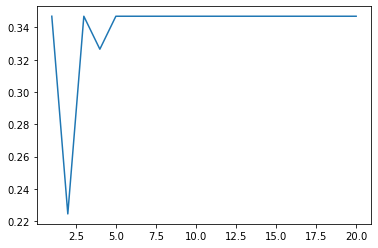

In [15]:
plt.plot(range(1, 21), scores)
plt.show()

The graphs show that essentially no matter the depth of the tree the score deviates very little. This suggests I a not using enough features. 

Let's add some features!

In [16]:
data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]

In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

In [20]:
scores = []
for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)

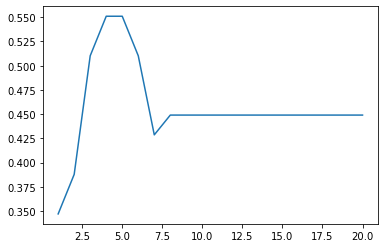

In [21]:
plt.plot(range(1, 21), scores)
plt.show()

By adding additional features the accuracy of the model is improving and we can see that it peaks with a tree dpeth of around 5-6.

### Predicting Language

In [22]:
labels_2 = flags[["Language"]]

In [23]:
train_data_2, test_data_2, train_labels_2, test_labels_2 = train_test_split(data, labels_2, random_state=1)

In [24]:
scores_2 = []
for i in range(1, 21):
    tree_2 = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree_2.fit(train_data_2, train_labels_2)
    score = tree_2.score(test_data_2, test_labels_2)
    scores_2.append(score)

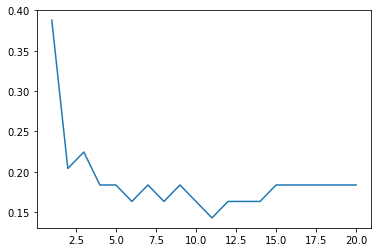

In [25]:
plt.plot(range(1, 21), scores_2)
plt.show()

Using the same features for predicting Landmass results in a low accuracy (not much better than randomly guessing - 16% accuracy) for predicting langauage. 

Let's try some different features. 

In [28]:
data_2 = flags[["Zone", "Landmass", "Religion"]]

In [29]:
train_data_2, test_data_2, train_labels_2, test_labels_2 = train_test_split(data_2, labels_2, random_state=1)

In [30]:
scores_2 = []
for i in range(1, 21):
    tree_2 = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree_2.fit(train_data_2, train_labels_2)
    score = tree_2.score(test_data_2, test_labels_2)
    scores_2.append(score)

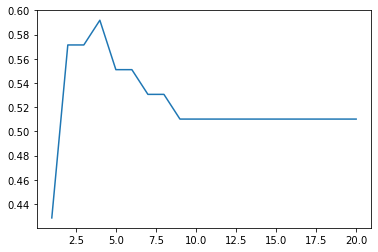

In [31]:
plt.plot(range(1, 21), scores_2)
plt.show()

The grpah shows by changing the features to focus on Zone, Landmass and Relgiion results in a significant improvement in accuracy at around a tree depth of 4. 